## Visualization 

>describe the data

In [9]:
# read in npp_mean_new.csv
import pandas as pd
import numpy as np

df_npp = pd.read_csv('npp_means_new.csv')
df_sst = pd.read_csv('sst_means_new.csv')
df_ncp = pd.read_csv('ncp_means_new.csv')

In [14]:
df_npp.sample(5)

,Lat,Long,Ocean,Cr_nmol/kg,npp_10,npp_11,npp_12,Year,npp_01,npp_02,npp_04,npp_05,npp_06,npp_07,npp_08,npp_09,npp_03,yearly_mean_npp
2598,-10.67,-25.01,Atlantic,2.917677,262.96430,191.65927,157.38142,2019,144.18753,117.75672,142.86716,164.56723,202.17067,210.56404,271.14157,233.32262,147.40056,187.16527
1051,-54.83,-95.68,Southern Ocean,3.666000,181.25964,221.44252,398.83360,2006,356.11337,161.99470,114.89456,93.00878,NaN,NaN,93.19200,147.46811,169.99965,193.82071
709,-47.00,141.90,Southern Ocean,3.514688,270.22687,474.66400,680.21390,2003,713.53730,414.66470,314.86768,184.34970,140.86868,128.42918,179.79625,219.80687,370.58652,341.00095
2811,-30.00,175.00,Pacific,3.192402,557.64374,388.14798,215.02892,2021,210.07161,198.92688,224.83154,355.32830,394.92377,450.68920,539.23645,634.05786,348.76108,376.47067
1215,1.68,-25.01,Atlantic,2.729274,270.08325,316.89258,315.17313,2007,376.67630,568.08640,349.71713,355.99112,456.07648,484.43295,506.90470,450.56107,342.75200,399.44560


In [15]:
df_sst.sample(5)

,Lat,Long,Ocean,Cr_nmol/kg,sst_09,sst_10,sst_11,sst_12,Year,sst_01,sst_02,sst_04,sst_05,sst_06,sst_07,sst_08,sst_03,yearly_mean_sst
689,69.816667,-138.333333,Arctic,1.827060,0.651406,-0.283750,NaN,NaN,2002,NaN,NaN,NaN,-1.528533,1.602574,1.503884,1.564970,NaN,0.585092
1271,71.100000,-139.016667,Arctic,1.995342,1.916990,0.510938,NaN,NaN,2007,NaN,NaN,NaN,NaN,-0.357812,1.345313,2.358283,NaN,1.154742
1577,18.900000,-108.800000,Pacific,2.978889,28.528097,28.625605,27.507330,26.132553,2010,26.191612,24.70399,25.738500,26.508627,26.489500,26.545725,28.084192,23.513557,26.547440
927,85.130000,-150.100000,Arctic,2.452609,NaN,NaN,NaN,NaN,2004,NaN,NaN,NaN,NaN,NaN,NaN,-1.345312,NaN,-1.345312
1784,-12.010000,-79.200000,Pacific,3.555996,18.172445,18.513628,19.862207,21.784960,2012,23.932580,24.86931,25.082039,24.280968,22.169666,20.515436,19.191713,24.051893,21.868904


> then I calculate 'ncp' values for each month and yearly mean 'ncp' using the given equation

In [ ]:
# Merge 'npp' dataframe and 'sst' dataframe
df = pd.merge(df_npp,df_sst, on=['Lat', 'Long', 'Year', 'Ocean','Cr_nmol/kg'])

# Create 'ncp' columns for each month
months = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']

for month in months:
    df['ncp_' + month] = 8.57 * df['npp_' + month] / (17.9 + df['sst_' + month])

# Calculate yearly mean 'ncp'
df['yearly_mean_ncp'] = df[['ncp_' + month for month in months]].mean(axis=1)

# Select the columns you need
df = df[['Lat', 'Long', 'Ocean', 'Cr_nmol/kg', 'Year', 'yearly_mean_ncp'] + ['ncp_' + month for month in months]]

# Save the dataframe to csv file
df.to_csv('ncp_means_new.csv', index=False)

In [16]:
df_ncp.sample(5)

,Lat,Long,Ocean,Cr_nmol/kg,Year,yearly_mean_ncp,ncp_01,ncp_02,ncp_03,ncp_04,ncp_05,ncp_06,ncp_07,ncp_08,ncp_09,ncp_10,ncp_11,ncp_12
2212,-53.583000,149.298000,Southern Ocean,3.489904,2016,73.233929,83.695710,74.157125,81.458340,54.549880,NaN,NaN,NaN,44.101902,69.692608,88.637392,90.887297,71.925110
931,-63.963000,-66.242000,Southern Ocean,3.811317,2005,166.075387,71.899184,118.604305,66.020507,68.829096,NaN,NaN,NaN,NaN,NaN,48.513441,385.373954,403.287224
2121,-15.999000,-76.998000,Pacific,3.760000,2015,231.363361,170.665268,116.986384,114.660129,275.884259,345.524582,254.204515,136.956654,165.064637,225.073810,248.801617,494.255215,228.283260
1654,-21.566667,-114.300000,Pacific,4.700000,2011,26.246387,16.127750,14.522512,16.253256,26.171769,27.423554,35.089437,37.591813,38.810349,33.500533,33.014219,20.042449,16.409001
193,24.283333,-114.983333,Pacific,3.188937,1998,102.351129,117.527431,146.216089,NaN,169.632686,120.873183,95.552731,80.162765,60.686352,63.437278,94.195882,84.302912,93.275115


> Their potential relationship

In [10]:
for col in df_npp.columns:
    if 'npp' in col:
        print(f"Correlation between 'Cr_nmol/kg' and '{col}': {df_npp['Cr_nmol/kg'].corr(df_npp[col])}")

Correlation between 'Cr_nmol/kg' and 'npp_10': -0.24431611074896756
Correlation between 'Cr_nmol/kg' and 'npp_11': -0.2845091902066358
Correlation between 'Cr_nmol/kg' and 'npp_12': -0.3069847667764157
Correlation between 'Cr_nmol/kg' and 'npp_01': -0.3715646038629125
Correlation between 'Cr_nmol/kg' and 'npp_02': -0.39482170045159737
Correlation between 'Cr_nmol/kg' and 'npp_04': -0.3816828978306618
Correlation between 'Cr_nmol/kg' and 'npp_05': -0.36832093529408694
Correlation between 'Cr_nmol/kg' and 'npp_06': -0.39266732559964096
Correlation between 'Cr_nmol/kg' and 'npp_07': -0.44666840496758886
Correlation between 'Cr_nmol/kg' and 'npp_08': -0.40598848919758845
Correlation between 'Cr_nmol/kg' and 'npp_09': -0.26756509754016256
Correlation between 'Cr_nmol/kg' and 'npp_03': -0.38479687230732
Correlation between 'Cr_nmol/kg' and 'yearly_mean_npp': -0.4331956417977734


In [12]:
for col in df_sst.columns:
    if 'sst' in col:
        print(f"Correlation between 'Cr_nmol/kg' and '{col}': {df_sst['Cr_nmol/kg'].corr(df_sst[col])}")

Correlation between 'Cr_nmol/kg' and 'sst_09': 0.12041011851551696
Correlation between 'Cr_nmol/kg' and 'sst_10': 0.11103742225277861
Correlation between 'Cr_nmol/kg' and 'sst_11': -0.0052715943934982445
Correlation between 'Cr_nmol/kg' and 'sst_12': -0.032861661808185165
Correlation between 'Cr_nmol/kg' and 'sst_01': -0.019514340726830618
Correlation between 'Cr_nmol/kg' and 'sst_02': 0.01722314779196005
Correlation between 'Cr_nmol/kg' and 'sst_04': 0.06619290530145922
Correlation between 'Cr_nmol/kg' and 'sst_05': 0.14906545528156573
Correlation between 'Cr_nmol/kg' and 'sst_06': 0.15633689231795891
Correlation between 'Cr_nmol/kg' and 'sst_07': 0.11855656813158182
Correlation between 'Cr_nmol/kg' and 'sst_08': 0.11209470737824474
Correlation between 'Cr_nmol/kg' and 'sst_03': 0.01930827797502948
Correlation between 'Cr_nmol/kg' and 'yearly_mean_sst': 0.13047233998979144


In [11]:
for col in df_ncp.columns:
    if 'ncp' in col:
        print(f"Correlation between 'Cr_nmol/kg' and '{col}': {df_ncp['Cr_nmol/kg'].corr(df_ncp[col])}")

Correlation between 'Cr_nmol/kg' and 'yearly_mean_ncp': -0.47702157470049844
Correlation between 'Cr_nmol/kg' and 'ncp_01': -0.36382951902651883
Correlation between 'Cr_nmol/kg' and 'ncp_02': -0.3963055759828173
Correlation between 'Cr_nmol/kg' and 'ncp_03': -0.3827259811182633
Correlation between 'Cr_nmol/kg' and 'ncp_04': -0.3845829196349322
Correlation between 'Cr_nmol/kg' and 'ncp_05': -0.37432673471262096
Correlation between 'Cr_nmol/kg' and 'ncp_06': -0.37745551331197025
Correlation between 'Cr_nmol/kg' and 'ncp_07': -0.44949956150894527
Correlation between 'Cr_nmol/kg' and 'ncp_08': -0.4300568775473874
Correlation between 'Cr_nmol/kg' and 'ncp_09': -0.32171361459738235
Correlation between 'Cr_nmol/kg' and 'ncp_10': -0.21788747789710963
Correlation between 'Cr_nmol/kg' and 'ncp_11': -0.25967649677294263
Correlation between 'Cr_nmol/kg' and 'ncp_12': -0.28582475010687713


> in a conclusion , there is a high correlation between npp and Cr_nmol/kg , but not sst, we increase the correlation a bit in the case of ncp. 

> Here are some visualizations

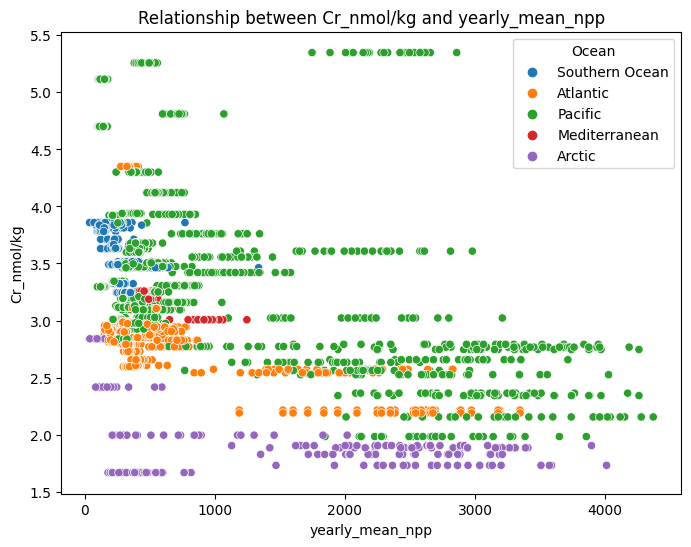

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

npp_cols = ['yearly_mean_npp']

for col in npp_cols:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df, x=col, y='Cr_nmol/kg', hue='Ocean')
    plt.title(f'Relationship between Cr_nmol/kg and {col}')
    plt.show()


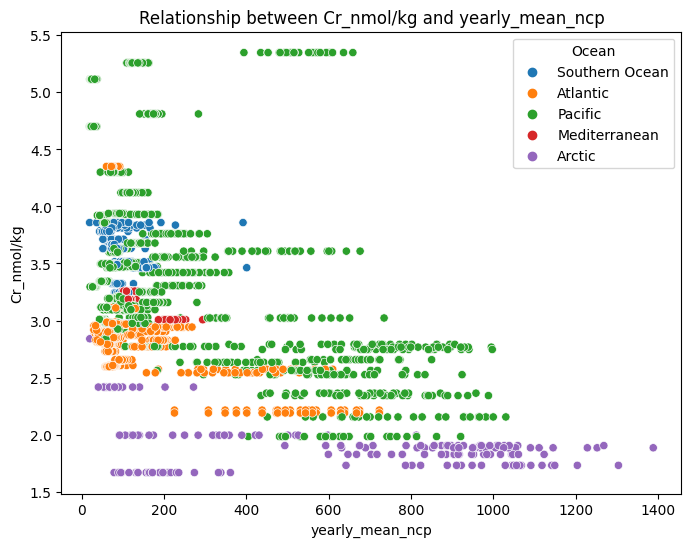

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

npp_cols = ['yearly_mean_ncp']

for col in npp_cols:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df_ncp, x=col, y='Cr_nmol/kg', hue='Ocean')
    plt.title(f'Relationship between Cr_nmol/kg and {col}')
    plt.show()